In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../')
from rllte.evaluation.visualization import _annotate_and_decorate_axis

In [42]:
all_data = {'disagreement': [], 'e3b': []}
for seed in range(3):   
    file = "../misc/baseline/PPO_SuperMarioBros-1-1-v3_disagreement_obsRMS:True_rewNorm:rms_updateProp:1.0_rff:False_s1/train.log"
    data = pd.read_csv(file)
    all_data['disagreement'].append(data['episode_reward'])
    file = "../misc/baseline/PPO_SuperMarioBros-1-1-v3_e3b_obsRMS:False_rewNorm:rms_updateProp:1.0_rff:False_s1/train.log"
    data = pd.read_csv(file)
    all_data['e3b'].append(data['episode_reward'])

for key in all_data.keys():
    all_data[key] = np.array(all_data[key])
    indices = np.linspace(0, all_data[key].shape[1]-1, 10, dtype=int)
    all_data[key] = all_data[key][:, indices]

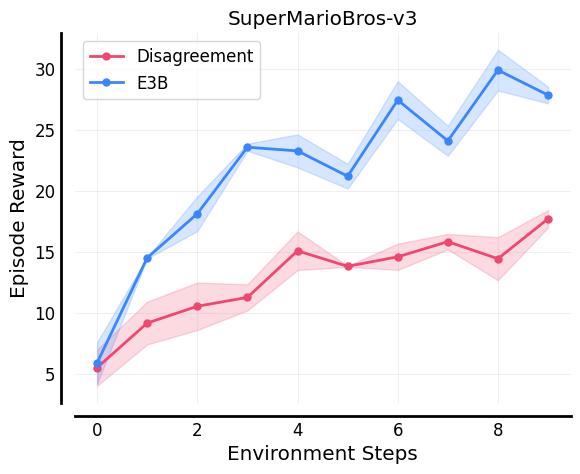

In [49]:
fig, ax = plt.subplots()

mean = all_data['disagreement'].mean(axis=0)
std = np.random.rand(10) * 2
ax.plot(mean, linewidth=2, marker='o', markersize=5, c='#ef476f', label='Disagreement')
ax.fill_between(range(len(mean)), mean+std, mean-std, alpha=0.2, color='#ef476f')

mean = all_data['e3b'].mean(axis=0)
std = np.random.rand(10) * 2
ax.plot(mean, linewidth=2, marker='o', markersize=5, c='#3a86ff', label='E3B')
ax.fill_between(range(len(mean)), mean+std, mean-std, alpha=0.2, color='#3a86ff')

ax.set_title('SuperMarioBros-v3', fontsize="x-large")
ax = _annotate_and_decorate_axis(ax, 
                                 ticklabelsize="large",
                                 xlabel="Environment Steps", 
                                 ylabel="Episode Reward"
                                 )
ax.legend(loc='upper left', fontsize='large')